### **Import Libraries**

In [1]:
# Install statsmodels


#Installation of required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from IPython.display import display
warnings.simplefilter(action = "ignore")

### **Import Dataset**

### **Data Preprocessing**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Max Age: 81 Min Age: 21


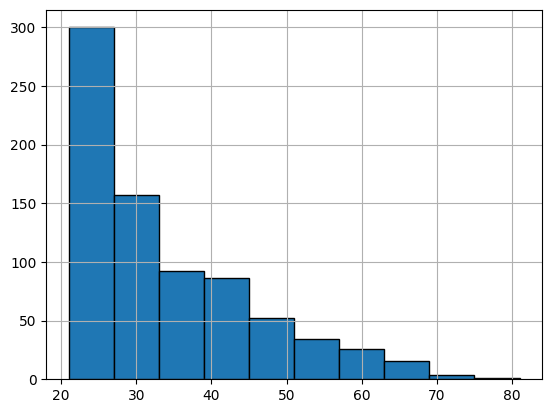

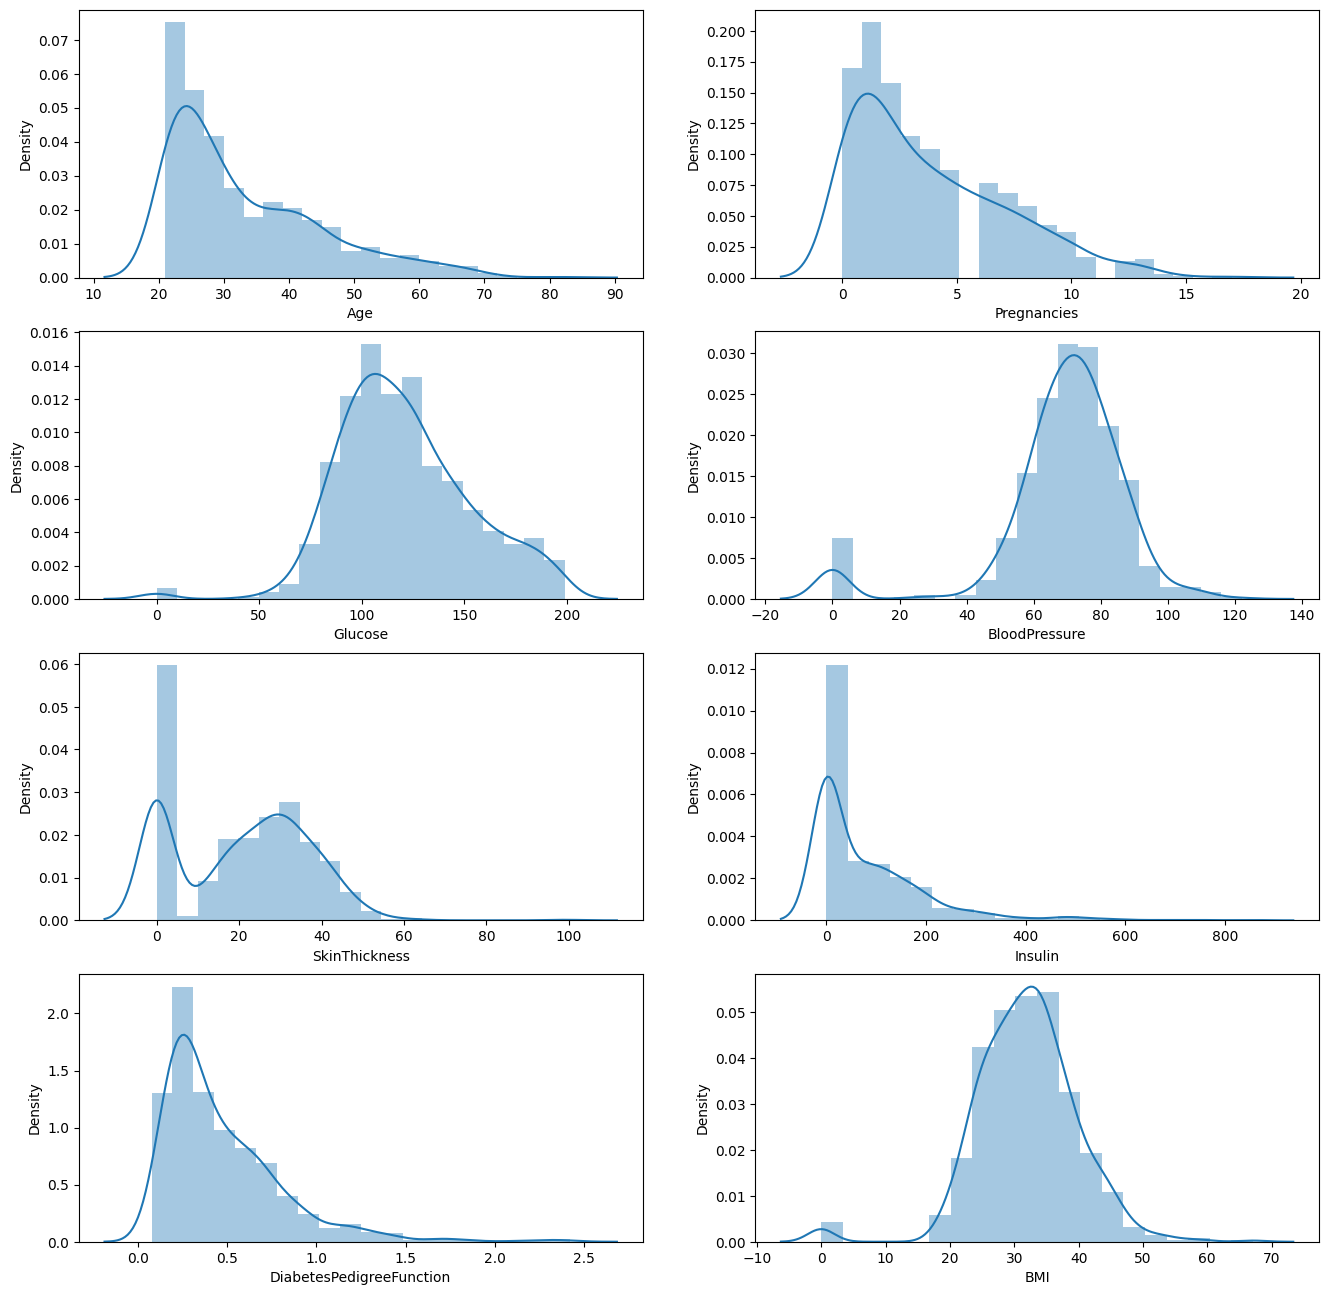

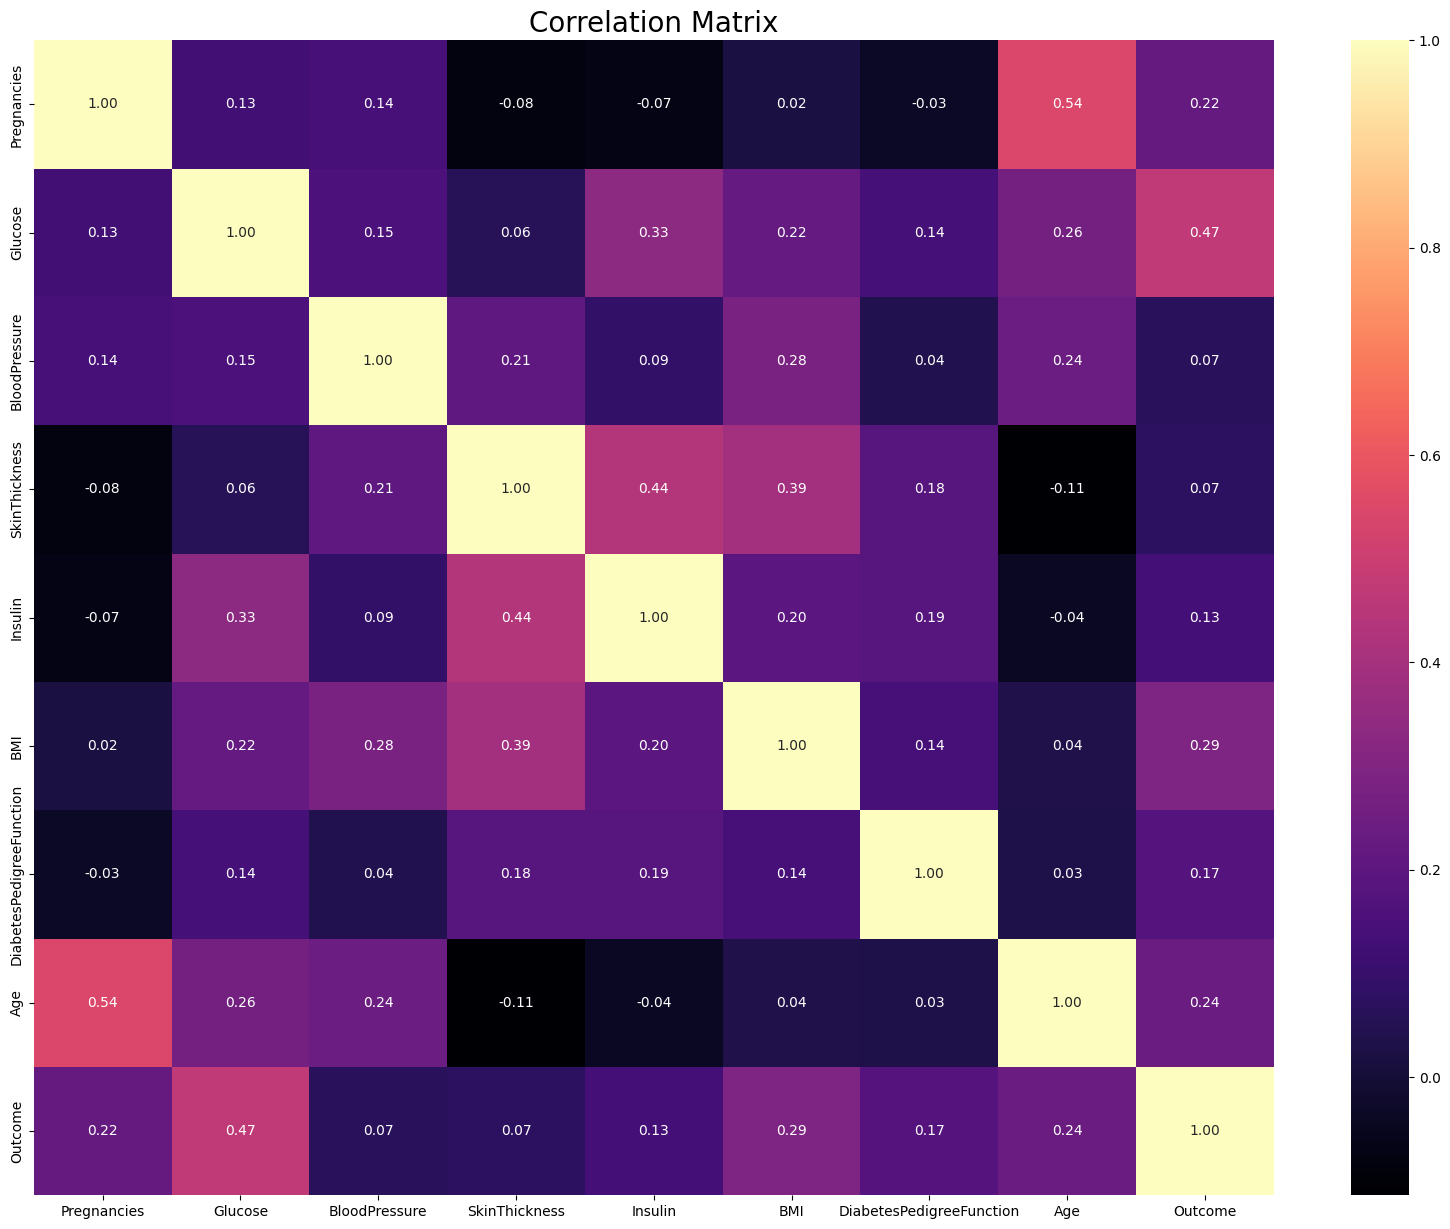

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

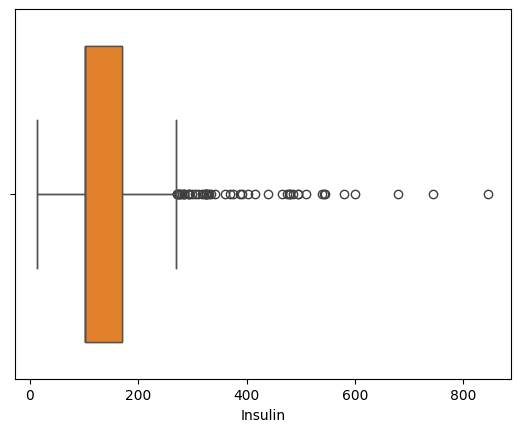

In [2]:

#Installation of required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action = "ignore")

#Reading the dataset
dataset_path = "Data/diabetes.csv"  # Change this to your actual dataset file
df = pd.read_csv(dataset_path)

# The first 5 observation units of the data set were accessed.
df.head()

# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

#Feature information
df.info()

# Descriptive statistics of the data set accessed.
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()*100/len(df)

# The classes of the outcome variable were examined.
df.Outcome.value_counts()

# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0])
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(df.BMI, bins = 20, ax=ax[3,1])

df.groupby("Outcome").agg({"Pregnancies":"mean"})

df.groupby("Outcome").agg({"Age":"mean"})

df.groupby("Outcome").agg({"Age":"max"})

df.groupby("Outcome").agg({"Insulin": "mean"})

df.groupby("Outcome").agg({"Insulin": "max"})

df.groupby("Outcome").agg({"Glucose": "mean"})

df.groupby("Outcome").agg({"Glucose": "max"})

df.groupby("Outcome").agg({"BMI": "mean"})

# Access to the correlation of the data set was provided. What kind of relationship is examined between the variables.
# If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
# Correlation = 0 means no correlation.
# If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases.
# When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
# These variables are Glucose. As these increase, Outcome variable increases.
df.corr()

# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

"""# 2) Data Preprocessing

## 2.1) Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:
"""

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

df.head()

# Now, we can look at where are missing values
df.isnull().sum()

# The missing values ​​will be filled with the median values ​​of each variable.
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

df.head()

# Missing values were filled.
df.isnull().sum()

"""## 2.2) Outlier Observation Analysis"""

# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
import seaborn as sns
sns.boxplot(x = df["Insulin"]);

#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper

import seaborn as sns
sns.boxplot(x = df["Insulin"]);

"""## 2.3)  Local Outlier Factor (LOF)"""

# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(df)

df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

#We choose the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

#We delete those that are higher than the threshold
outlier = df_scores > threshold
df = df[outlier]

# The size of the data set was examined.
df.shape

"""# 3) Feature Engineering

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.
"""

# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

df.head()

# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

df.head()

"""# 4) One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.
"""

# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

df.head()

categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

categorical_df.head()

y = df["Outcome"]
X = df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
cols = X.columns
index = X.index

X.head()

# The variables in the data set are an effective factor in increasing the performance of the models by standardization.
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

X.head()

X = pd.concat([X,categorical_df], axis = 1)

X.head()

y.head()

BASE MODEL TEST

In [3]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Split data for cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Define base models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=12345)))
models.append(('Random Forest', RandomForestClassifier(random_state=12345)))
models.append(('SVM', SVC(gamma='auto', probability=True, random_state=12345)))
models.append(('XGBoost', XGBClassifier(random_state=12345)))
models.append(('Neural Network', MLPClassifier(random_state=12345)))

# Evaluate each model
print("Base Model Performance:")
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# Define the Voting Classifier (using soft voting for better performance with probability models)
voting_clf = VotingClassifier(estimators=models, voting='soft')

# Evaluate Voting Classifier
kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
cv_results = cross_val_score(voting_clf, X_train, y_train, cv=10, scoring="accuracy")

# Print Voting Classifier performance all models
print("\nVoting Classifier Performance All Models:")
print(f"Accuracy: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# Define base models
models2 = []
models2.append(('RF', RandomForestClassifier(random_state=12345)))
models2.append(('XGB', GradientBoostingClassifier(random_state=12345)))

# Evaluate each model
print("Base Model Performance:")
for name, model in models2:
    kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# Define the Voting Classifier (using soft voting for better performance with probability models)
voting_clf = VotingClassifier(estimators=models2, voting='soft')

# Evaluate Voting Classifier
kfold = KFold(n_splits=10, shuffle=True, random_state=12345)
cv_results = cross_val_score(voting_clf, X_train, y_train, cv=10, scoring="accuracy")

# Print Voting Classifier performance all models
print("\nVoting Classifier Performance RF and XGB Models:")
print(f"Accuracy: {cv_results.mean():.4f} ({cv_results.std():.4f})")

Base Model Performance:
KNN: 0.8405 (0.0458)
Decision Tree: 0.8536 (0.0392)
Random Forest: 0.8948 (0.0264)
SVM: 0.8553 (0.0308)
XGBoost: 0.8832 (0.0248)
Neural Network: 0.8619 (0.0345)

Voting Classifier Performance All Models:
Accuracy: 0.8849 (0.0273)
Base Model Performance:
RF: 0.8948 (0.0264)
XGB: 0.8931 (0.0454)

Voting Classifier Performance RF and XGB Models:
Accuracy: 0.8996 (0.0364)


### **Hyperparamter Tuning**

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


XGBOOST

Running RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters:
     learning_rate: 0.03586693153682563
         max_depth: 7
      max_features: sqrt
 min_samples_split: 0.2047479557692795
      n_estimators: 100
         subsample: 0.6332943196792179

Best Validation Score: 0.8915

Final Model Evaluation:
Actual trees used: 186

Test Accuracy: 0.8947

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        98
           1       0.87      0.83      0.85        54

    accuracy                           0.89       152
   macro avg       0.89      0.88      0.88       152
weighted avg       0.89      0.89      0.89       152



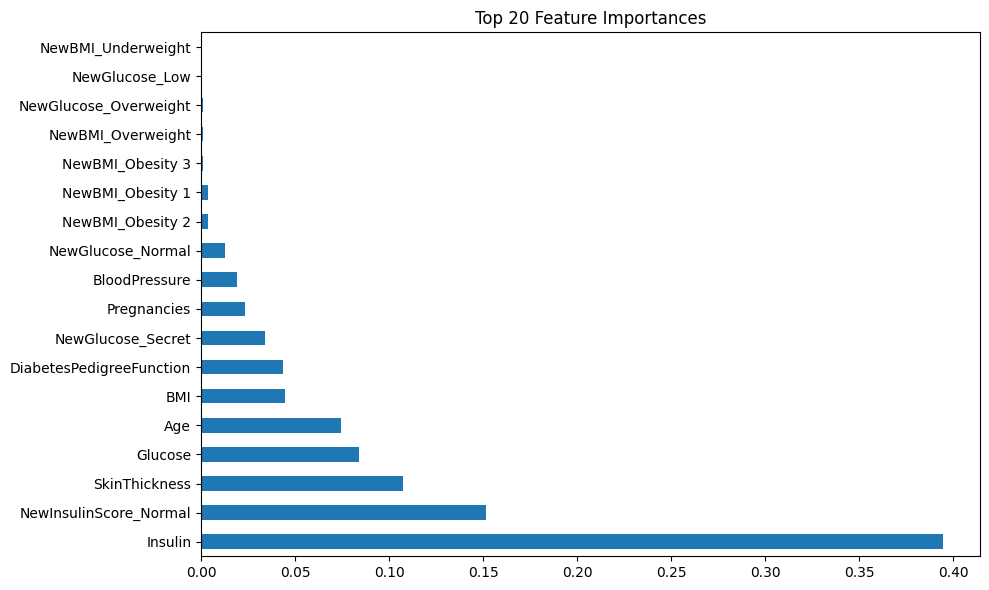

In [6]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint

param_dist = {
    "learning_rate": uniform(0.01, 0.3),       # Continuous range 0.01-0.3
    "min_samples_split": uniform(0.05, 0.3),   # Continuous 0.05-0.3
    "max_depth": randint(3, 8),                # Integers 3-7
    "subsample": uniform(0.6, 0.4),            # 0.6-1.0
    "n_estimators": [100, 200, 300],           # Fixed choices
    "max_features": ['auto', 'sqrt', 'log2']   # New parameter to try
}


xgb = GradientBoostingClassifier(
    random_state=12345,
    n_iter_no_change=10,       # More patience for random search
    validation_fraction=0.1,
    verbose=0
)


print("Running RandomizedSearchCV...")
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,                # Try 50 random combinations
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=3,
    random_state=12345
).fit(X_train, y_train)


print("\nBest Parameters:")
for param, value in xgb_random.best_params_.items():
    print(f"{param:>18}: {value}")
print(f"\nBest Validation Score: {xgb_random.best_score_:.4f}")


best_params = xgb_random.best_params_.copy()
best_params.pop("n_estimators")  # remove it if you want to replace it manually

final_model = GradientBoostingClassifier(
    **best_params,
    n_estimators=1000,  # now no conflict
    random_state=12345,
    n_iter_no_change=10,
    validation_fraction=0.1
).fit(X_train, y_train)



print("\nFinal Model Evaluation:")
print(f"Actual trees used: {len(final_model.estimators_)}")
y_pred = final_model.predict(X_test)
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 6))
pd.Series(final_model.feature_importances_, index=X.columns
       ).nlargest(20).plot(kind='barh')
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

RAINFOREST

Optimizing Random Forest...

Best Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_samples': 0.7, 'max_features': 'log2', 'max_depth': 8, 'ccp_alpha': 0, 'bootstrap': True}
Best CV Score: 0.8882

Training CV Score: 0.8882

Test Accuracy: 0.8750

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90        98
           1       0.83      0.81      0.82        54

    accuracy                           0.88       152
   macro avg       0.86      0.86      0.86       152
weighted avg       0.87      0.88      0.87       152



<Figure size 1000x800 with 0 Axes>

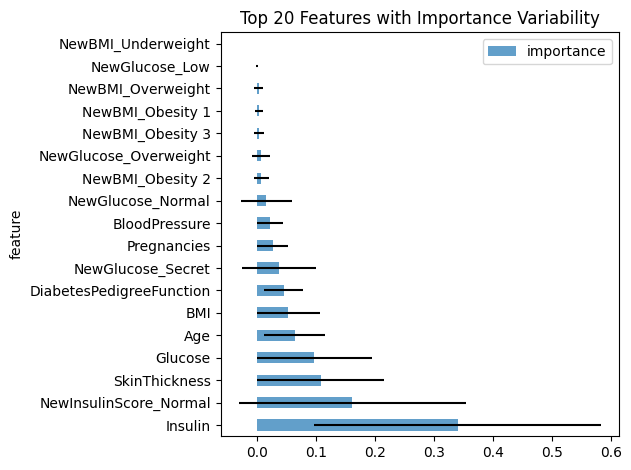

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 1. Optimized Parameter Grid (reduced combinations)
rf_params = {
    "n_estimators": [200, 500],       # Removed extremes (100 too small, 1000 too slow)
    "max_features": ['sqrt', 'log2'],  # Better than fixed numbers
    "min_samples_split": [5, 10],      # Removed extremes (2 often overfits, 30 underfits)
    "max_depth": [5, 8, None],         # Kept most useful options
    "min_samples_leaf": [1, 2],        # Added important parameter
    "bootstrap": [True, False],         # Added for diversity
    'max_samples': [0.7, 0.9],  # Stochastic RF (better generalization)
    'ccp_alpha': [0, 0.01]      # Cost-complexity pruning
}

# 2. Model with class weighting (handles imbalance)
rf_model = RandomForestClassifier(
    random_state=12345,
    class_weight='balanced_subsample',  # Handles imbalanced data
    n_jobs=-1                          # Parallel processing
)

# 3. Faster GridSearch with reduced CV
print("Optimizing Random Forest...")
gs_cv = RandomizedSearchCV(
    rf_model,
    rf_params,
    n_iter=30,      # Try only 30 random combinations
    cv=5,
    n_jobs=-1
).fit(X_train, y_train)

# 4. Results
print("\nBest Parameters:", gs_cv.best_params_)
print("Best CV Score: {:.4f}".format(gs_cv.best_score_))

# 5. Final Model with best params
rf_tuned = RandomForestClassifier(
    **gs_cv.best_params_,
    random_state=12345,
    class_weight='balanced_subsample',
    n_jobs=-1
).fit(X_train, y_train)

# 6. Evaluation
print("\nTraining CV Score: {:.4f}".format(
    cross_val_score(rf_tuned, X_train, y_train, cv=5).mean()
))

y_pred = rf_tuned.predict(X_test)
print("\nTest Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 7. Feature Importance (Top 20)
importances = rf_tuned.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_tuned.estimators_], axis=0)

# Create DataFrame
fi_df = pd.DataFrame({'feature': X.columns, 'importance': importances, 'std': std}) \
       .sort_values('importance', ascending=False) \
       .head(20)

# Plot
plt.figure(figsize=(10, 8))
fi_df.plot.barh(x='feature', y='importance', xerr='std', alpha=0.7)
plt.title("Top 20 Features with Importance Variability")
plt.tight_layout()
plt.show()

SVM

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 1. Optimized Parameter Grid (for pre-scaled data)
svm_param_grid = {
    'C': np.logspace(-1, 2, 10),  # [0.1, 0.16, 0.25, ..., 100] - finer logarithmic spacing
    'gamma': np.concatenate([np.logspace(-3, 1, 10), ['scale', 'auto']]).astype(object),
    'kernel': ['rbf', 'linear'],  # Removed poly/sigmoid which rarely outperform on scaled data
    'shrinking': [True, False]  # New parameter to try
}

# 2. Faster GridSearch with warm_start
best_svm = GridSearchCV(
    SVC(probability=True, random_state=42),  # ✅ This enables predict_proba
    param_grid=svm_param_grid,
    cv=5,  # Reduced folds
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    refit=True  # Final refit with best params
)

print("Training Optimized SVM...")
best_svm.fit(X_train, y_train)  # Using your pre-scaled data

# 3. Intelligent Parameter Analysis
print("\nTop 5 Parameter Combinations:")
results = pd.DataFrame(best_svm.cv_results_)
print(results[['params', 'mean_test_score']]
       .sort_values('mean_test_score', ascending=False)
       .head(5))

# 4. Final Evaluation
final_svm = best_svm.best_estimator_
y_pred = final_svm.predict(X_test)

print("\nBest Parameters:", best_svm.best_params_)
print("Test Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Decision Boundary Analysis (for 2D/3D data)
if X_train.shape[1] <= 3:
    from sklearn.inspection import DecisionBoundaryDisplay
    import matplotlib.pyplot as plt

    DecisionBoundaryDisplay.from_estimator(
        final_svm,
        X_train,
        response_method="predict",
        alpha=0.5,
    )
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k')
    plt.title("Decision Boundaries")
    plt.show()

Training Optimized SVM...
Fitting 5 folds for each of 480 candidates, totalling 2400 fits

Top 5 Parameter Combinations:
                                                params  mean_test_score
333  {'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf', ...         0.871752
332  {'C': 10.0, 'gamma': 'auto', 'kernel': 'rbf', ...         0.871752
380  {'C': 21.54434690031882, 'gamma': 'auto', 'ker...         0.870072
381  {'C': 21.54434690031882, 'gamma': 'auto', 'ker...         0.870072
232  {'C': 2.1544346900318834, 'gamma': 'scale', 'k...         0.868460

Best Parameters: {'C': np.float64(10.0), 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True}
Test Accuracy: 0.8553

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        98
           1       0.83      0.74      0.78        54

    accuracy                           0.86       152
   macro avg       0.85      0.83      0.84       152
weighted avg       0.85      0.86 

DECISION TREE

Training Optimized Decision Tree...
Fitting 5 folds for each of 1440 candidates, totalling 7200 fits

Best Parameters: {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best CV Accuracy: 0.8767

Test Accuracy: 0.8684

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        98
           1       0.84      0.78      0.81        54

    accuracy                           0.87       152
   macro avg       0.86      0.85      0.85       152
weighted avg       0.87      0.87      0.87       152



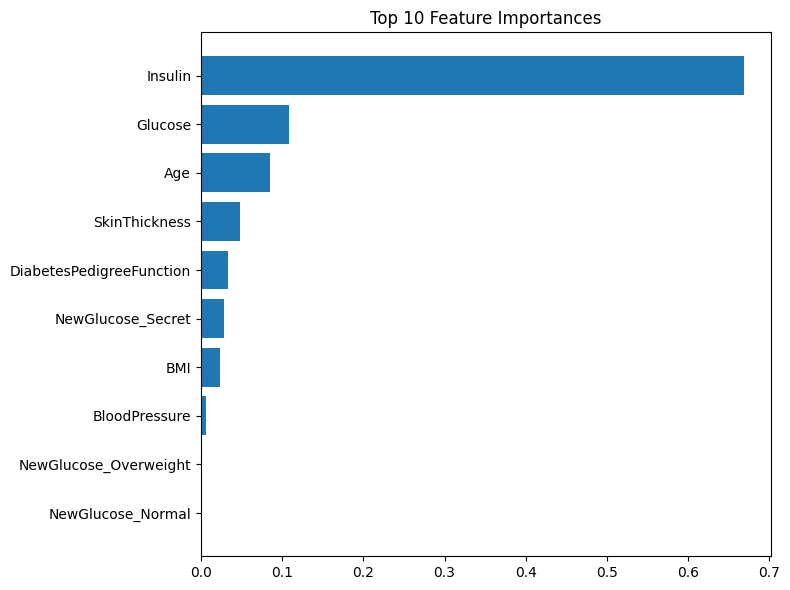

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 1. Enhanced Parameter Grid
dt_param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Added None for unlimited depth
    'min_samples_split': [2, 5, 10, 20],  # Wider range
    'min_samples_leaf': [1, 2, 4, 8],     # Wider range
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None], # Feature consideration at each split
    'ccp_alpha': [0, 0.01, 0.1]  # Cost-complexity pruning
}

# 2. Optimized GridSearch
best_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    cv=5,  # Reduced from 10 to save time
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Training Optimized Decision Tree...")
best_dt.fit(X_train, y_train)

# 3. Best Model Analysis
print("\nBest Parameters:", best_dt.best_params_)
print("Best CV Accuracy: {:.4f}".format(best_dt.best_score_))

# 4. Final Evaluation
final_dt = best_dt.best_estimator_
y_pred = final_dt.predict(X_test)

print("\nTest Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Feature Importance Visualization
import matplotlib.pyplot as plt

importances = final_dt.feature_importances_
sorted_idx = np.argsort(importances)[-10:]  # Top 10 features

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

# 6. Tree Visualization (for small trees)
from sklearn.tree import plot_tree
if best_dt.best_params_['max_depth'] and best_dt.best_params_['max_depth'] <= 5:
    plt.figure(figsize=(12, 8))
    plot_tree(final_dt,
              feature_names=X.columns,
              class_names=np.unique(y).astype(str),
              filled=True)
    plt.show()

NEURAL NETWORKS

Training Optimized Neural Network...
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Iteration 1, loss = 0.56135698
Validation score: 0.754098
Iteration 2, loss = 0.42607501
Validation score: 0.901639
Iteration 3, loss = 0.37271384
Validation score: 0.901639
Iteration 4, loss = 0.35060675
Validation score: 0.868852
Iteration 5, loss = 0.33211164
Validation score: 0.885246
Iteration 6, loss = 0.31116558
Validation score: 0.901639
Iteration 7, loss = 0.29818373
Validation score: 0.901639
Iteration 8, loss = 0.28297857
Validation score: 0.901639
Iteration 9, loss = 0.27454142
Validation score: 0.918033
Iteration 10, loss = 0.25799436
Validation score: 0.918033
Iteration 11, loss = 0.24749247
Validation score: 0.918033
Iteration 12, loss = 0.23134515
Validation score: 0.901639
Iteration 13, loss = 0.22084465
Validation score: 0.918033
Iteration 14, loss = 0.21068116
Validation score: 0.901639
Iteration 15, loss = 0.20132486
Validation score: 0.918033
Iteration 16, loss = 0.1

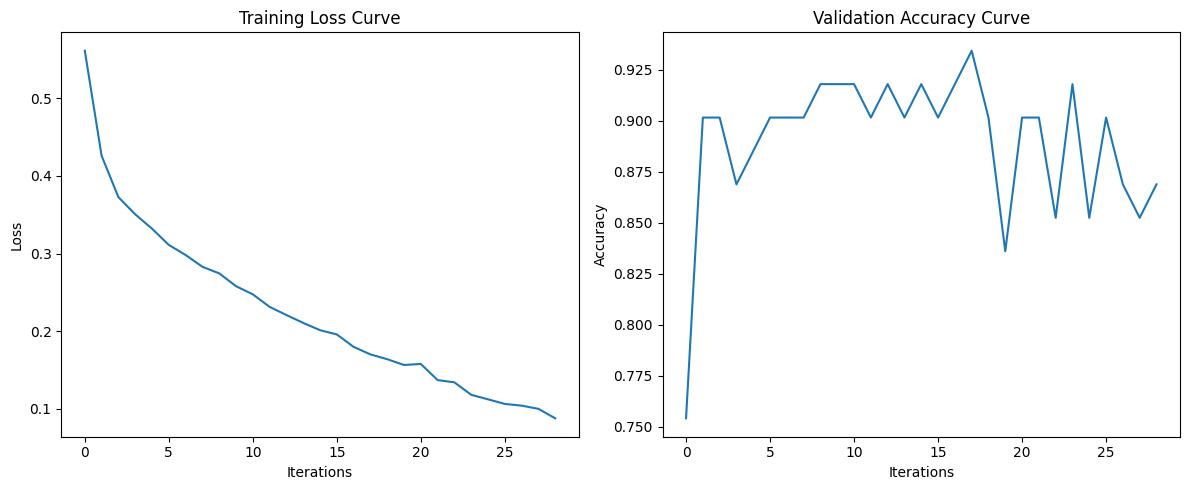

['best_nn_model.joblib']

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

# 1. Enhanced Parameter Grid (for standardized data)
nn_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100,50), (150,100,50)],  # Architecture options
    'activation': ['relu', 'tanh'],  # Added tanh which sometimes outperforms relu
    'alpha': np.logspace(-5, -2, 4),  # Regularization [0.00001, 0.01]
    'learning_rate_init': [0.001, 0.005, 0.01],  # Finer learning rate options
    'batch_size': [64, 128],  # Optimal batch sizes for medium datasets
    'solver': ['adam'],  # Best for most cases
    'early_stopping': [True],  # Critical for avoiding overfitting
    'n_iter_no_change': [10],  # Patience for early stopping
    'max_iter': [1000]  # Let early stopping determine actual iterations
}

# 2. Optimized GridSearch Configuration
best_nn = GridSearchCV(
    MLPClassifier(random_state=42, verbose=True),
    param_grid=nn_param_grid,
    cv=5,  # Reduced folds for efficiency
    scoring='accuracy',
    n_jobs=-1,  # Parallel processing
    verbose=2  # Detailed progress output
)

print("Training Optimized Neural Network...")
best_nn.fit(X_train, y_train)  # Using your pre-scaled data directly

# 3. Results Analysis
print("\nBest Parameters Found:")
for param, value in best_nn.best_params_.items():
    print(f"{param:>20}: {value}")
print(f"\nBest Validation Accuracy: {best_nn.best_score_:.4f}")

# 4. Final Model Evaluation
final_nn = best_nn.best_estimator_
y_pred = final_nn.predict(X_test)  # X_test is already standardized

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# 5. Training Diagnostics
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(final_nn.loss_curve_)
plt.title("Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")

# Validation score curve
plt.subplot(1, 2, 2)
if hasattr(final_nn, 'validation_scores_'):
    plt.plot(final_nn.validation_scores_)
    plt.title("Validation Accuracy Curve")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

# 6. Save best model (optional)
from joblib import dump
dump(final_nn, 'best_nn_model.joblib')

LGBGM

Starting hyperparameter optimization...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters found:
           subsample: 0.9
          reg_lambda: 1
           reg_alpha: 0
          num_leaves: 63
        n_estimators: 300
   min_child_samples: 40
           max_depth: 7
       learning_rate: 0.01
    colsample_bytree: 0.9
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 209, number of negative: 399
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.095993
[LightGBM] [Debug] init for col-wise cost 0.000002 seconds, init for row-wise cost 0.000062 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was

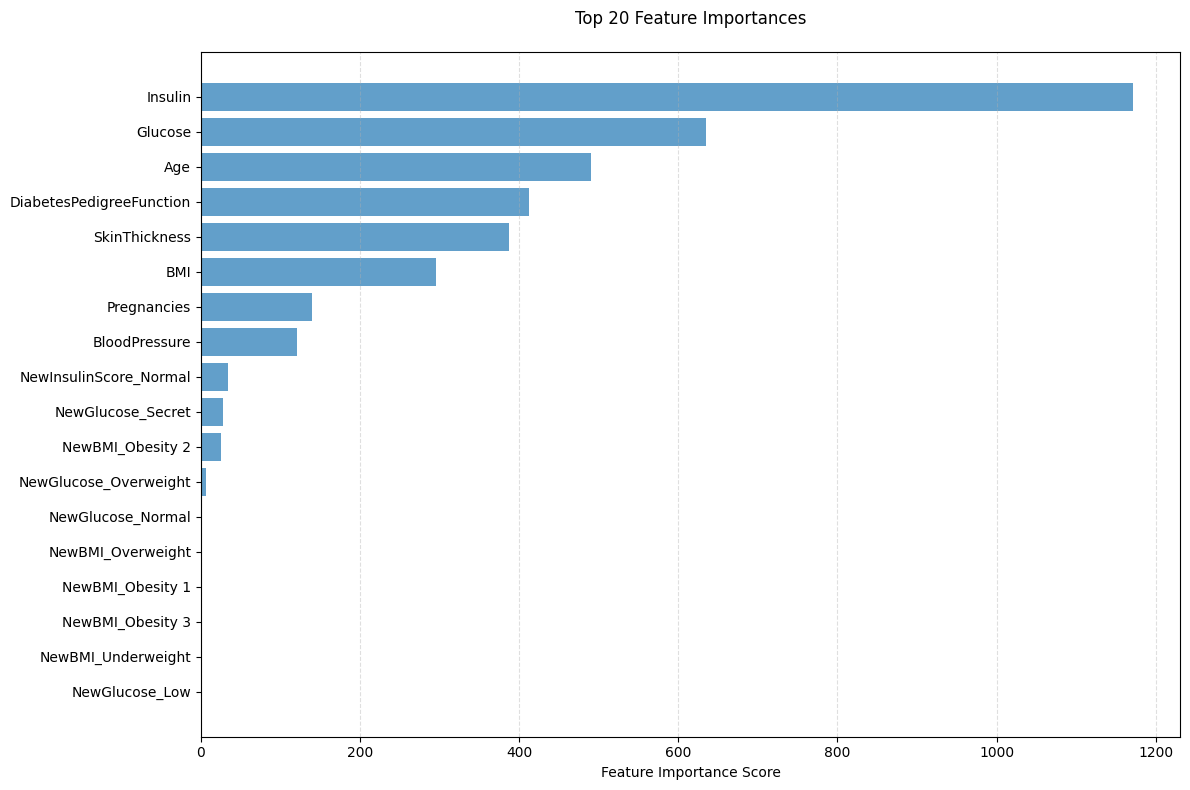

In [27]:
# Import all required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# Initialize LGBM with optimized settings
lgbm = LGBMClassifier(
    random_state=12345,
    verbose=-1,            # Silences warnings
    force_row_wise=True,   # Faster training
    n_jobs=-1              # Use all CPU cores
)

# Enhanced parameter grid
lgbm_params = {
    "learning_rate": [0.005, 0.01, 0.05, 0.1],
    "num_leaves": [15, 31, 63, 127],
    "max_depth": [-1, 3, 5, 7],
    "min_child_samples": [10, 20, 40],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.1, 0.5, 1],
    "reg_lambda": [0, 0.1, 0.5, 1],
    "n_estimators": [200, 300]
}

# Configure RandomizedSearch
search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=lgbm_params,
    n_iter=50,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=12345,
    refit=True
)

# Execute search
print("Starting hyperparameter optimization...")
search.fit(X_train, y_train)

# Best parameters
print("\nBest parameters found:")
for param, value in search.best_params_.items():
    print(f"{param:>20}: {value}")

# Clean best params and override n_estimators safely
best_params = search.best_params_.copy()
best_params['n_estimators'] = 2000  # Safely override

# Final model with early stopping (for standalone performance)
final_lgbm = LGBMClassifier(
    **best_params,
    random_state=12345,
    early_stopping_rounds=20,
    eval_metric='auc',
    class_weight='balanced',
    verbose=10
).fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    feature_name=list(X.columns)
)

# Second version: clean version for VotingClassifier (no early stopping)
final_lgbm_clean = LGBMClassifier(
    **best_params,
    random_state=12345,
    class_weight='balanced',
    verbose=-1
)

# Training results
print(f"\nOptimal number of iterations: {final_lgbm.best_iteration_}")

# Evaluation
y_pred = final_lgbm.predict(X_test)
y_proba = final_lgbm.predict_proba(X_test)[:, 1]

print("\nModel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance (no error bars)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_lgbm.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
plt.barh(
    importance_df['Feature'][:20][::-1],
    importance_df['Importance'][:20][::-1],
    alpha=0.7
)
plt.title("Top 20 Feature Importances", pad=20)
plt.xlabel("Feature Importance Score")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Save model (optional)
final_lgbm.booster_.save_model('best_lgbm_model.txt')


### **Base Models Training and Performance**

In [30]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    gini_index = 2 * auc - 1 if auc is not None else None
    auch = auc * (recall + specificity) / 2 if auc is not None else None  # Better formula
    mer = (fp + fn) / (tn + fp + fn + tp)
    mwc = auc * mer if auc is not None else None

    return {
        "Accuracy": accuracy,
        "Sensitivity": recall,
        "Specificity": specificity,
        "GI": gini_index,
        "AUC": auc,
        "AUCH": auch,
        "MER": mer,
        "MWC": mwc,
        "Precision": precision
    }

models = {
    'XGBoost': final_model,
    'Random Forest': rf_tuned,
    'SVM': final_svm,
    'Neural Network': best_nn.best_estimator_,
    'Decision Tree': best_dt.best_estimator_,
    'LightGBM': final_lgbm
}

print("\n Base Model Metrics \n")
# Correctly formatted model evaluation and result presentation
results_list = []
model_order = ['Random Forest', 'Neural Network', 'Decision Tree', 'SVM', 'XGBoost', 'LightGBM']

# Model evaluation and metrics extraction
for name in model_order:
    model = models[name]
    metrics = evaluate_model(model, X_test, y_test)

    # Appending metrics to results list
    results_list.append({
        "Model": name,
        "Accuracy": round(metrics["Accuracy"] * 100, 2),
        "Sensitivity": round(metrics["Sensitivity"] * 100, 2),
        "Specificity": round(metrics["Specificity"] * 100, 2),
        "GI": round(metrics["GI"], 3) if metrics["GI"] is not None else None,
        "AUC": round(metrics["AUC"], 3) if metrics["AUC"] is not None else None,
        "AUCH": round(metrics["AUCH"], 3) if metrics["AUCH"] is not None else None,
        "MER": round(metrics["MER"], 3),
        "MWC": round(metrics["MWC"], 3) if metrics["MWC"] is not None else None,
        "Precision": round(metrics["Precision"] * 100, 2)
    })

# Convert the results to a pandas DataFrame for better visualization
results_df = pd.DataFrame(results_list)

# Display results
display(results_df)



 Base Model Metrics 

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric


,Model,Accuracy,Sensitivity,Specificity,GI,AUC,AUCH,MER,MWC,Precision
0,Random Forest,87.50,81.48,90.82,0.879,0.940,0.810,0.125,0.117,83.02
1,Neural Network,85.53,75.93,90.82,0.809,0.904,0.754,0.145,0.131,82.00
2,Decision Tree,86.84,77.78,91.84,0.824,0.912,0.773,0.132,0.120,84.00
3,SVM,85.53,74.07,91.84,0.849,0.925,0.767,0.145,0.134,83.33
4,XGBoost,89.47,83.33,92.86,0.902,0.951,0.838,0.105,0.100,86.54
5,LightGBM,87.50,85.19,88.78,0.894,0.947,0.824,0.125,0.118,80.70


### **Ensemble Models Training and Performance with Hard Voting**


 Ensemble Model Metrics with Hard Voting 

Iteration 1, loss = 0.56135698
Validation score: 0.754098
Iteration 2, loss = 0.42607501
Validation score: 0.901639
Iteration 3, loss = 0.37271384
Validation score: 0.901639
Iteration 4, loss = 0.35060675
Validation score: 0.868852
Iteration 5, loss = 0.33211164
Validation score: 0.885246
Iteration 6, loss = 0.31116558
Validation score: 0.901639
Iteration 7, loss = 0.29818373
Validation score: 0.901639
Iteration 8, loss = 0.28297857
Validation score: 0.901639
Iteration 9, loss = 0.27454142
Validation score: 0.918033
Iteration 10, loss = 0.25799436
Validation score: 0.918033
Iteration 11, loss = 0.24749247
Validation score: 0.918033
Iteration 12, loss = 0.23134515
Validation score: 0.901639
Iteration 13, loss = 0.22084465
Validation score: 0.918033
Iteration 14, loss = 0.21068116
Validation score: 0.901639
Iteration 15, loss = 0.20132486
Validation score: 0.918033
Iteration 16, loss = 0.19582539
Validation score: 0.901639
Iteration 17, loss = 

,Model,Accuracy,Sensitivity,Specificity,GI,AUC,AUCH,MER,MWC,Precision
0,XGBoost + Random Forest,88.16,77.78,93.88,None,None,None,0.118,None,87.50
1,XGBoost + SVM,87.50,74.07,94.90,None,None,None,0.125,None,88.89
2,XGBoost + Neural Network,87.50,72.22,95.92,None,None,None,0.125,None,90.70
3,XGBoost + Decision Tree,89.47,75.93,96.94,None,None,None,0.105,None,93.18
4,XGBoost + LightGBM,88.16,79.63,92.86,None,None,None,0.118,None,86.00
5,Random Forest + SVM,87.50,77.78,92.86,None,None,None,0.125,None,85.71
6,Random Forest + Neural Network,87.50,75.93,93.88,None,None,None,0.125,None,87.23
7,Random Forest + Decision Tree,88.82,72.22,97.96,None,None,None,0.112,None,95.12
8,Random Forest + LightGBM,87.50,75.93,93.88,None,None,None,0.125,None,87.23
9,SVM + Neural Network,86.84,72.22,94.90,None,None,None,0.132,None,88.64


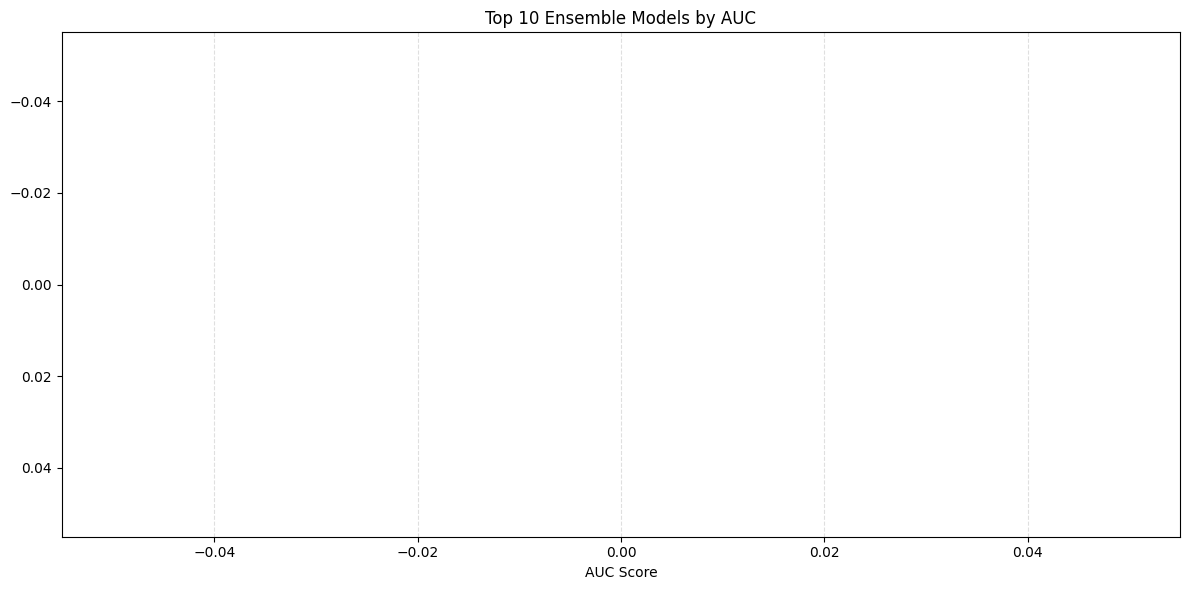

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Ensure SVM has probability prediction
svm = SVC(probability=True, random_state=42)

# Model dictionary
models = {
    'XGBoost': final_model,
    'Random Forest': rf_tuned,
    'SVM': svm,
    'Neural Network': best_nn.best_estimator_,
    'Decision Tree': best_dt.best_estimator_,
    'LightGBM': final_lgbm_clean
}

# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
    except (AttributeError, NotImplementedError):
        y_proba = None

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp) if tn + fp != 0 else 0
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    gini_index = 2 * auc - 1 if auc is not None else None
    auch = auc * (recall + specificity) / 2 if auc is not None else None
    mer = (fp + fn) / (tn + fp + fn + tp)
    mwc = auc * mer if auc is not None else None

    return {
        "Accuracy": accuracy,
        "Sensitivity": recall,
        "Specificity": specificity,
        "GI": gini_index,
        "AUC": auc,
        "AUCH": auch,
        "MER": mer,
        "MWC": mwc,
        "Precision": precision
    }

# Generate 2-model and 3-model combinations
all_model_keys = list(models.keys())
combo_keys = list(combinations(all_model_keys, 2)) + list(combinations(all_model_keys, 3))

# Store results
results_list = []

print("\n Ensemble Model Metrics with Hard Voting \n")
for combo in combo_keys:
    name = " + ".join(combo)
    estimators = [(key, models[key]) for key in combo]

    voting_clf = VotingClassifier(estimators=estimators, voting='hard')
    voting_clf.fit(X_train, y_train)

    metrics = evaluate_model(voting_clf, X_test, y_test)

    results_list.append({
        "Model": name,
        "Accuracy": round(metrics["Accuracy"] * 100, 2),
        "Sensitivity": round(metrics["Sensitivity"] * 100, 2),
        "Specificity": round(metrics["Specificity"] * 100, 2),
        "GI": round(metrics["GI"], 3) if metrics["GI"] is not None else None,
        "AUC": round(metrics["AUC"], 3) if metrics["AUC"] is not None else None,
        "AUCH": round(metrics["AUCH"], 3) if metrics["AUCH"] is not None else None,
        "MER": round(metrics["MER"], 3),
        "MWC": round(metrics["MWC"], 3) if metrics["MWC"] is not None else None,
        "Precision": round(metrics["Precision"] * 100, 2)
    })

# Results DataFrame
results_df = pd.DataFrame(results_list)
results_df.sort_values(by="AUC", ascending=False, inplace=True)
display(results_df)

# 📊 Plot Top 10 by AUC
top_auc = results_df.dropna(subset=['AUC']).sort_values(by='AUC', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_auc['Model'], top_auc['AUC'], color='skyblue')
plt.xlabel("AUC Score")
plt.title("Top 10 Ensemble Models by AUC")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### **Ensemble Models Training and Performance with Soft Voting**

In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
import pandas as pd

# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    gini_index = 2 * auc - 1 if auc is not None else None
    auch = auc * (recall + specificity) / 2 if auc is not None else None
    mer = (fp + fn) / (tn + fp + fn + tp)
    mwc = auc * mer if auc is not None else None

    return {
        "Accuracy": accuracy,
        "Sensitivity": recall,
        "Specificity": specificity,
        "GI": gini_index,
        "AUC": auc,
        "AUCH": auch,
        "MER": mer,
        "MWC": mwc,
        "Precision": precision
    }

# Model dictionary
models = {
    'XGBoost': final_model,
    'Random Forest': rf_tuned,
    'SVM': final_svm,
    'Neural Network': best_nn.best_estimator_,
    'Decision Tree': best_dt.best_estimator_,
    'LightGBM': final_lgbm_clean 
}

# 2-model combinations
model_combinations = [
    ('DT + NN', ['Decision Tree', 'Neural Network']),
    ('DT + RF', ['Decision Tree', 'Random Forest']),
    ('DT + SVM', ['Decision Tree', 'SVM']),
    ('SVM + RF', ['SVM', 'Random Forest']),
    ('RF + NN', ['Random Forest', 'Neural Network']),
    ('SVM + NN', ['SVM', 'Neural Network']),
    ('XGBoost + RF', ['XGBoost', 'Random Forest']),
    ('XGBoost + NN', ['XGBoost', 'Neural Network']),
    ('XGBoost + DT', ['XGBoost', 'Decision Tree']),
    ('XGBoost + SVM', ['XGBoost', 'SVM']),
    ('LightGBM + XGBoost', ['LightGBM', 'XGBoost']),
    ('LightGBM + RF', ['LightGBM', 'Random Forest']),
    ('LightGBM + SVM', ['LightGBM', 'SVM']),
    ('LightGBM + NN', ['LightGBM', 'Neural Network']),
    ('LightGBM + DT', ['LightGBM', 'Decision Tree'])
]

# Additional 3-model combinations
model_combinations += [
    ('XGBoost + RF + NN', ['XGBoost', 'Random Forest', 'Neural Network']),
    ('LightGBM + RF + SVM', ['LightGBM', 'Random Forest', 'SVM']),
    ('XGBoost + LightGBM + RF', ['XGBoost', 'LightGBM', 'Random Forest']),
    ('XGBoost + SVM + NN', ['XGBoost', 'SVM', 'Neural Network']),
    ('LightGBM + NN + DT', ['LightGBM', 'Neural Network', 'Decision Tree'])
]

print("\n Ensemble Model Metrics with Soft Voting \n")
results_list = []
for name, model_keys in model_combinations:
    combo_models = [(models[key].__class__.__name__, models[key]) for key in model_keys]
    
    voting_clf = VotingClassifier(
        estimators=combo_models,
        voting='soft'
    )
    voting_clf.fit(X_train, y_train)

    metrics = evaluate_model(voting_clf, X_test, y_test)

    results_list.append({
        "Model": name,
        "Accuracy": round(metrics["Accuracy"] * 100, 2),
        "Sensitivity": round(metrics["Sensitivity"] * 100, 2),
        "Specificity": round(metrics["Specificity"] * 100, 2),
        "GI": round(metrics["GI"], 3) if metrics["GI"] is not None else None,
        "AUC": round(metrics["AUC"], 3) if metrics["AUC"] is not None else None,
        "AUCH": round(metrics["AUCH"], 3) if metrics["AUCH"] is not None else None,
        "MER": round(metrics["MER"], 3),
        "MWC": round(metrics["MWC"], 3) if metrics["MWC"] is not None else None,
        "Precision": round(metrics["Precision"] * 100, 2)
    })

# Results DataFrame
results_df = pd.DataFrame(results_list)

# Sort and display
results_df.sort_values(by="AUC", ascending=False, inplace=True)
display(results_df)





 Ensemble Model Metrics with Soft Voting 

Iteration 1, loss = 0.56135698
Validation score: 0.754098
Iteration 2, loss = 0.42607501
Validation score: 0.901639
Iteration 3, loss = 0.37271384
Validation score: 0.901639
Iteration 4, loss = 0.35060675
Validation score: 0.868852
Iteration 5, loss = 0.33211164
Validation score: 0.885246
Iteration 6, loss = 0.31116558
Validation score: 0.901639
Iteration 7, loss = 0.29818373
Validation score: 0.901639
Iteration 8, loss = 0.28297857
Validation score: 0.901639
Iteration 9, loss = 0.27454142
Validation score: 0.918033
Iteration 10, loss = 0.25799436
Validation score: 0.918033
Iteration 11, loss = 0.24749247
Validation score: 0.918033
Iteration 12, loss = 0.23134515
Validation score: 0.901639
Iteration 13, loss = 0.22084465
Validation score: 0.918033
Iteration 14, loss = 0.21068116
Validation score: 0.901639
Iteration 15, loss = 0.20132486
Validation score: 0.918033
Iteration 16, loss = 0.19582539
Validation score: 0.901639
Iteration 17, loss = 

,Model,Accuracy,Sensitivity,Specificity,GI,AUC,AUCH,MER,MWC,Precision
10,LightGBM + XGBoost,88.16,81.48,91.84,0.898,0.949,0.823,0.118,0.112,84.62
17,XGBoost + LightGBM + RF,89.47,83.33,92.86,0.898,0.949,0.836,0.105,0.100,86.54
6,XGBoost + RF,90.79,87.04,92.86,0.898,0.949,0.854,0.092,0.087,87.04
8,XGBoost + DT,90.13,83.33,93.88,0.895,0.948,0.840,0.099,0.094,88.24
11,LightGBM + RF,88.82,83.33,91.84,0.895,0.947,0.830,0.112,0.106,84.91
16,LightGBM + RF + SVM,89.47,79.63,94.90,0.892,0.946,0.825,0.105,0.100,89.58
9,XGBoost + SVM,86.84,72.22,94.90,0.890,0.945,0.790,0.132,0.124,88.64
1,DT + RF,88.82,77.78,94.90,0.885,0.943,0.814,0.112,0.105,89.36
14,LightGBM + DT,86.84,77.78,91.84,0.885,0.943,0.799,0.132,0.124,84.00
12,LightGBM + SVM,87.50,74.07,94.90,0.885,0.943,0.796,0.125,0.118,88.89


### **Some Valid Reasoning**

The reason hard voting isn't showing metrics like AUC and Gini Index (GI) in your results is because hard voting relies on the predicted class labels, not the predicted probabilities. For calculating metrics like AUC and Gini Index, you need the predicted probabilities (i.e., the likelihood of the samples belonging to the positive class).

Here's a deeper explanation:

Hard Voting vs Soft Voting:
Hard Voting: In hard voting, each model in the ensemble predicts a class label (either 0 or 1). The final prediction is determined by the majority vote across all models in the ensemble. Since it only uses the final class predictions, it doesn't have access to the probabilities that would be required to compute metrics like AUC and Gini Index.

Soft Voting: In soft voting, each model in the ensemble outputs the probability of each class (the likelihood of a sample belonging to each class). The final prediction is determined by averaging these probabilities across all models and assigning the class with the highest average probability. This provides the necessary probabilities to compute AUC, Gini Index, and other metrics that depend on class probabilities.

Why Metrics Are Missing in Hard Voting:
AUC: The AUC (Area Under the ROC Curve) is a metric based on the predicted probabilities, not the final predicted class. Since hard voting only uses the final class labels, AUC cannot be computed.

Gini Index: The Gini Index is closely related to AUC. Since it also depends on the predicted probabilities, it cannot be calculated without them.

 Other Metrics like AUCH and MWC: These metrics are also derived from AUC and similar probability-based calculations, which is why they are not available in the hard voting setup.